In [46]:
import os
from pathlib import Path
import pyrootutils
import IPython
import warnings
import pandas as pd
from src.data import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

path_workdir: Path = Path(pyrootutils.find_root(search_from=os.curdir, indicator=".project-root"))
os.chdir(Path(path_workdir))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploratory data analysis -- Subtask A

In [47]:
from src.create_split_subtask_a import create_subtask_a_df
df = create_subtask_a_df()

In [48]:
df

,id,sentence,label,sentence_length
0,1,he put an elephant into the fridge,0,7
1,1,he put a turkey into the fridge,1,7
2,2,my sister eats an apple after breakfast every day,1,9
3,2,my sister eats a stone after breakfast every day,0,9
4,3,money can be used for buying cars,1,7
...,...,...,...,...
4037,2019,people have to hold onto their shoes because o...,0,11
4038,2020,Rebecca wakes up because she takes sleeping pills,0,8
4039,2020,Rebecca wakes up because she sets an alarm,1,8
4040,2021,people bleed when they feel hot,0,6


Text(0.5, 1.0, 'Frequency of labels in subtask A')

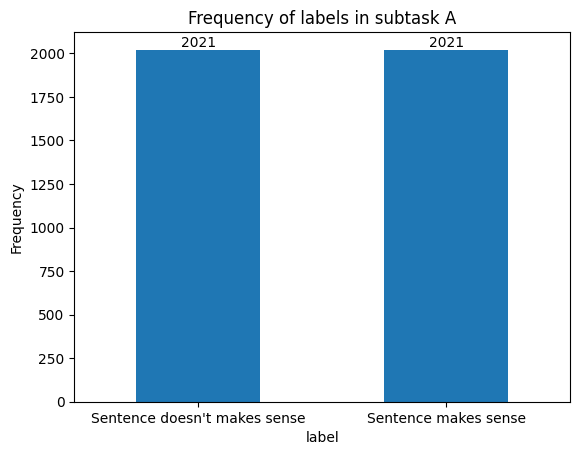

In [49]:
import matplotlib.pyplot as plt

ax = df["label"].value_counts().T.plot.bar()
ax.bar_label(ax.containers[0])

plt.xticks([0,1], ["Sentence doesn't makes sense", 'Sentence makes sense'], rotation=0)
plt.ylabel('Frequency')
plt.title('Frequency of labels in subtask A')

> **We can perform random label split without worrying about split balance and dataset label distribution**

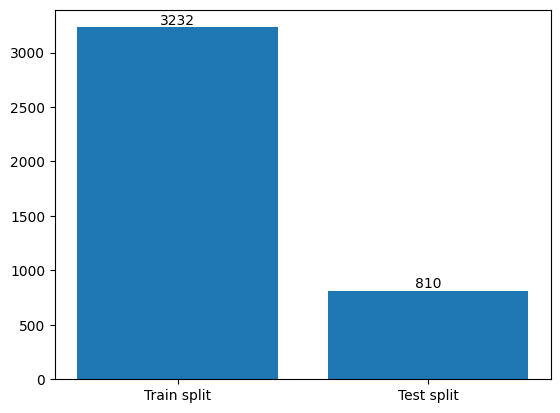

In [50]:
from src.defaults import PATH_TEST_A, PATH_TRAIN_A

df_train, df_test = pd.read_csv(PATH_TRAIN_A), pd.read_csv(PATH_TEST_A)
ax = plt.bar(["Train split", "Test split"], [df_train["label"].count(), df_test["label"].count()])
plt.bar_label(ax)
plt.show()

In [51]:
display(df_train.head())
display(df_test.head())

,id,sentence,label,sentence_length
0,1,he put an elephant into the fridge,0,7
1,1,he put a turkey into the fridge,1,7
2,2,my sister eats an apple after breakfast every day,1,9
3,2,my sister eats a stone after breakfast every day,0,9
4,5,a man can better see stars and the moon in day...,0,11


,id,sentence,label,sentence_length
0,3,money can be used for buying cars,1,7
1,3,money can be used for buying stars,0,7
2,4,New York is located in the northeastern part o...,1,10
3,4,USA is located in the northeastern part of New...,0,10
4,7,his mother became satisfied after he got good ...,1,13


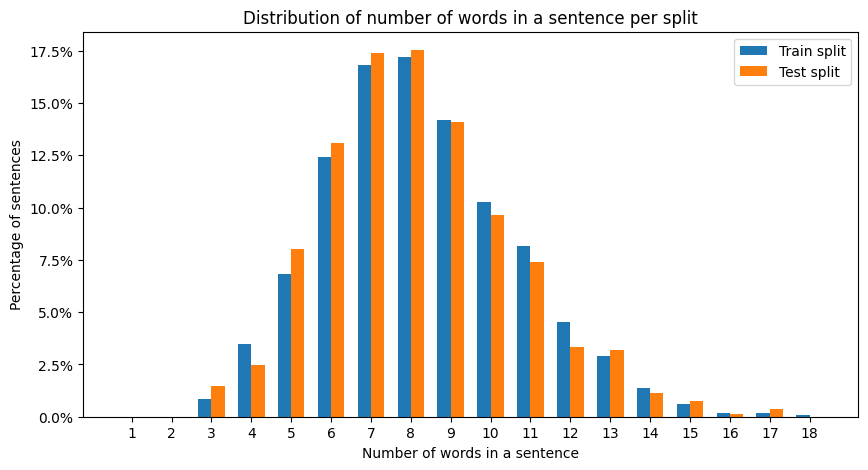

In [52]:

import matplotlib.ticker as mtick
import numpy as np

all_bins = np.arange(1, max(df["sentence_length"]) + 2, 1)

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title('Distribution of number of words in a sentence per split')
ax.set_xticks(all_bins[:-1])
a_heights, a_bins = np.histogram(df_train['sentence_length'], bins=all_bins, density=True)
b_heights, b_bins = np.histogram(df_test['sentence_length'], bins=a_bins, density=True)

a_heights = a_heights * 100
b_heights = b_heights * 100

bin_width = (a_bins[1] - a_bins[0])/3
half_width = bin_width / 2

ax.bar(a_bins[:-1] - half_width, a_heights, width=bin_width, label='Train split')
ax.bar(b_bins[:-1] + half_width, b_heights, width=bin_width, label='Test split')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel('Number of words in a sentence')
ax.set_ylabel('Percentage of sentences')

plt.legend()

# 🏖️ Playground area

In [53]:
from datasets import Dataset
# https://huggingface.co/docs/datasets/main/index
dataset = Dataset.from_pandas(df_train)

In [54]:
from transformers import DebertaV2TokenizerFast
dataset

Dataset({
    features: ['id', 'sentence', 'label', 'sentence_length'],
    num_rows: 3232
})